In [13]:
import mmcv
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import numpy as np
import torch

In [15]:
img1 = mmcv.imread('./1_1_1_0_0.png')

FileNotFoundError: [Errno 2] No such file or directory: './1_1_1_0_0.png'

In [19]:
img1=np.array(torch.rand(480,640,3))

In [20]:
img, scale_factor = mmcv.imrescale(
    img1,
    (640, 640),
    return_scale=True,
    interpolation='bilinear',
    backend='cv2')
# the w_scale and h_scale has minor difference
# a real fix should be done in the mmcv.imrescale in the future
new_h, new_w = img.shape[:2]
h, w = img.shape[:2]
w_scale = new_w / w
h_scale = new_h / h

In [21]:
img.shape

(480, 640, 3)

In [44]:
scale[0]

480

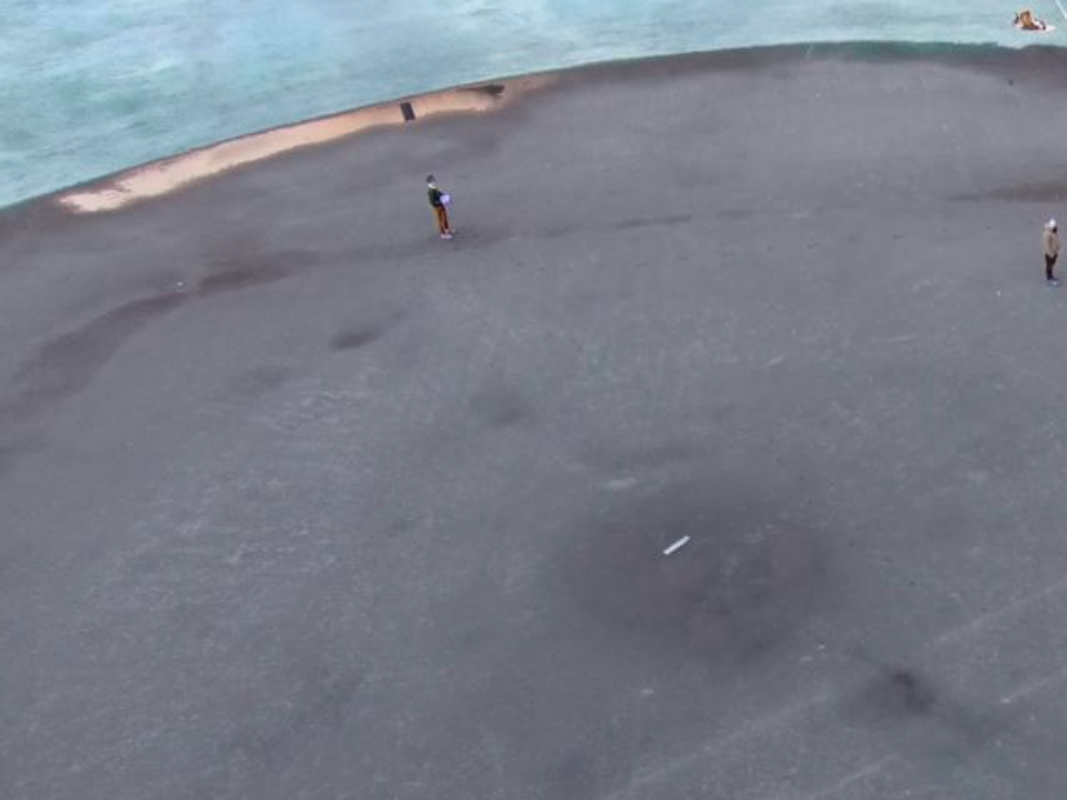

In [16]:
im = Image.open('1_1_1_0_0.jpg')
imgshow =Image.fromarray(np.array(img).astype('uint8'))
imgshow

In [12]:
img

array([[[165, 202, 224],
        [161, 198, 220],
        [159, 196, 218],
        ...,
        [152, 181, 190],
        [143, 172, 181],
        [152, 181, 190]],

       [[160, 197, 219],
        [157, 194, 216],
        [154, 191, 213],
        ...,
        [151, 180, 189],
        [155, 184, 193],
        [153, 182, 191]],

       [[162, 199, 221],
        [159, 196, 218],
        [156, 193, 215],
        ...,
        [155, 182, 192],
        [165, 192, 202],
        [156, 183, 193]],

       ...,

       [[112, 114, 125],
        [111, 113, 124],
        [109, 111, 122],
        ...,
        [106, 110, 121],
        [106, 110, 121],
        [106, 110, 121]],

       [[108, 110, 121],
        [108, 110, 121],
        [108, 110, 121],
        ...,
        [106, 110, 121],
        [106, 110, 121],
        [106, 110, 121]],

       [[103, 105, 116],
        [105, 107, 118],
        [107, 109, 120],
        ...,
        [106, 110, 121],
        [106, 110, 121],
        [106, 110, 121]]

In [17]:
def noise(img_tensor, noise_tensor, a, y_tensor):
    result_tensor=a*img_tensor+(1-a)*noise_tensor+y_tensor
    return result_tensor

In [18]:
img.shape

(800, 1067, 3)

In [19]:
y_tensor=torch.ones(img.shape)

In [20]:
noise_tensor_night=torch.ones((img.shape))-1

In [21]:
noise_tensor_day=torch.ones(img.shape)*255

In [22]:
img_tensor=torch.tensor(img)

In [29]:
result_tensor = noise(img_tensor,noise_tensor_day,0.1,y_tensor)

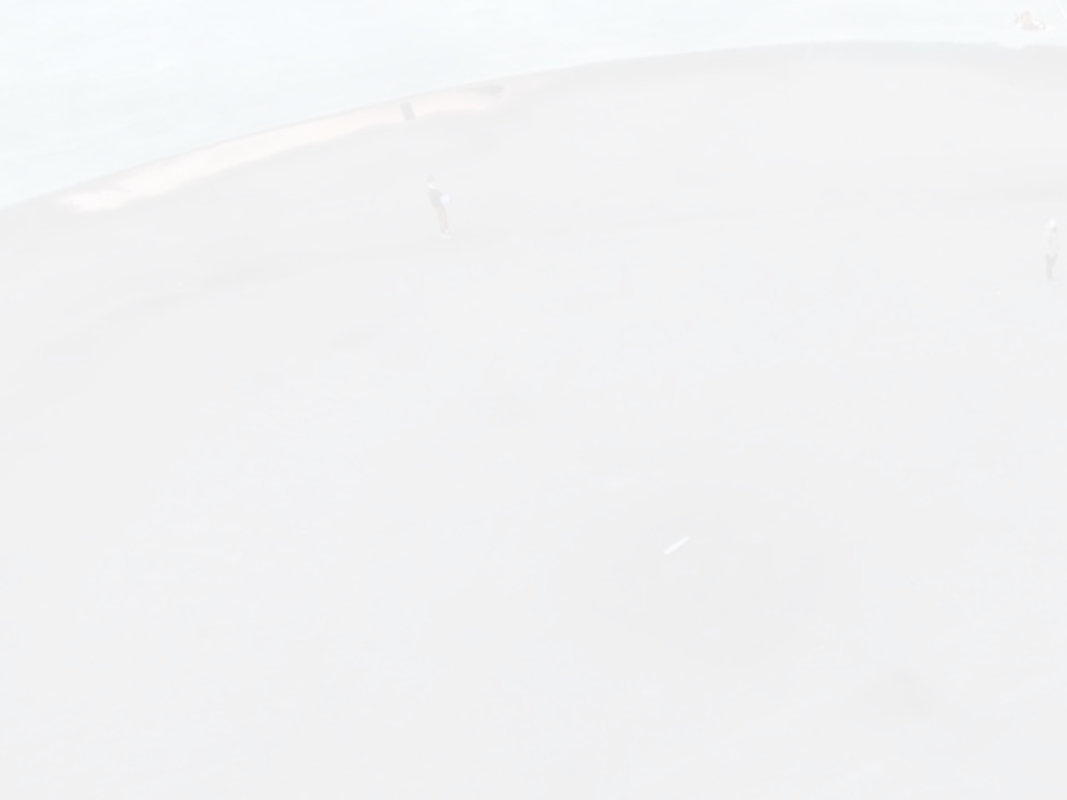

In [30]:
Image.fromarray(np.array(result_tensor).astype('uint8'))

In [31]:
cloud = mmcv.imread( './weather/perlinMap_1_1.png')
# cloud_arr = np.asarray(cloud).astype(float)
cloud_tensor=torch.tensor(cloud)

In [32]:
cloud_tensor=torch.nn.functional.interpolate(cloud_tensor.permute(2,0,1).unsqueeze(0),(img.shape[0],img.shape[1]))
cloud_tensor= torch.squeeze(cloud_tensor).permute(1,2,0)

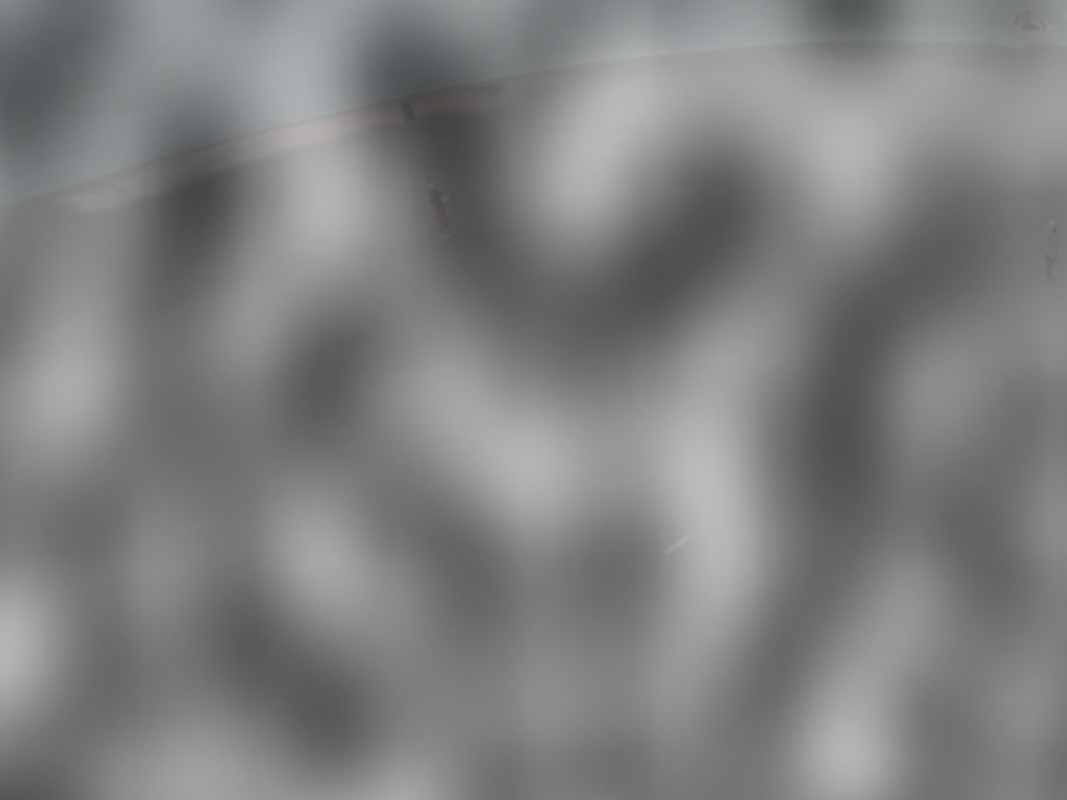

In [33]:
result_tensor = noise(img_tensor,cloud_tensor,0.1,y_tensor)
Image.fromarray(np.array(result_tensor).astype('uint8'))

In [34]:
fog = Image.open( './weather/perlinMap_4_4.png')
fog_arr = np.asarray(fog).astype(float)
fog_tensor=torch.tensor(fog_arr)
fog_tensor=torch.nn.functional.interpolate(fog_tensor.permute(2,0,1).unsqueeze(0),(img.shape[0],img.shape[1]))
fog_tensor= torch.squeeze(fog_tensor).permute(1,2,0)

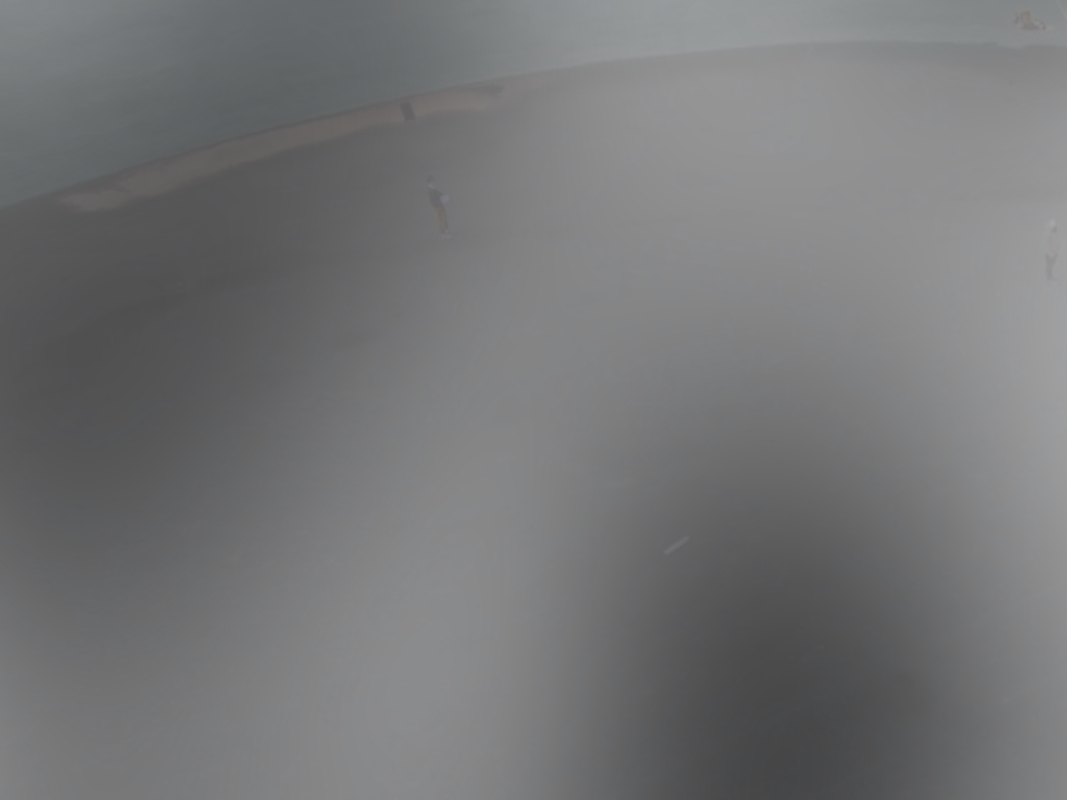

In [36]:
result_tensor = noise(img_tensor,fog_tensor,0.1,y_tensor)
Image.fromarray(np.array(result_tensor).astype('uint8'))

In [55]:
import random

In [60]:
random.randint(0,3)

1